In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

#initialize the decision tree model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

#train the model and calculate training time
start_time = time.time()
dt_model.fit(X_train, y_train)
dt_train_time = time.time() - start_time

#evaluate the model on the training data
dt_train_accuracy = dt_model.score(X_train, y_train)

#calculate the testing time
start_time = time.time()
dt_test_accuracy = dt_model.score(X_val, y_val)
dt_test_time = time.time() - start_time

#print the results
print("Decision Tree - Training Time:", dt_train_time, "s")
print("Decision Tree - Training Accuracy:", dt_train_accuracy)
print("Decision Tree - Test Accuracy:", dt_test_accuracy)
print("Decision Tree - Testing Time:", dt_test_time, "s")


Decision Tree - Training Time: 1.0637390613555908 s
Decision Tree - Training Accuracy: 0.8726197788697788
Decision Tree - Test Accuracy: 0.8595117457392907
Decision Tree - Testing Time: 0.0073626041412353516 s


In [ ]:
import pandas as pd

#load training and validation data
X_train = pd.read_csv('/content/X_train.csv')
y_train = pd.read_csv('/content/y_train.csv')
X_val = pd.read_csv('/content/X_val.csv')
y_val = pd.read_csv('/content/y_val.csv')

#print the shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')


X_train shape: (26048, 100)
y_train shape: (26048, 1)
X_val shape: (6513, 100)
y_val shape: (6513, 1)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

#initialize gaussian naive bayes model
nb_model = GaussianNB()

#train and test
start_time = time.time()
nb_model.fit(X_train, y_train)
nb_train_time = time.time() - start_time
nb_train_accuracy = nb_model.score(X_train, y_train)

start_time = time.time()
nb_test_accuracy = nb_model.score(X_val, y_val)
nb_test_time = time.time() - start_time

print("Naive Bayes - Training Time:", nb_train_time, "s")
print("Naive Bayes - Training Accuracy:", nb_train_accuracy)
print("Naive Bayes - Test Accuracy:", nb_test_accuracy)
print("Naive Bayes - Testing Time:", nb_test_time, "s")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes - Training Time: 0.307985782623291 s
Naive Bayes - Training Accuracy: 0.7943412162162162
Naive Bayes - Test Accuracy: 0.7990173499155535
Naive Bayes - Testing Time: 0.0609288215637207 s


Logistic Regression Cross-validation scores: [0.84836852 0.85201536 0.84971209 0.85179497 0.8539067 ]
Mean Logistic Regression Cross-validation score: 0.8511595278952087


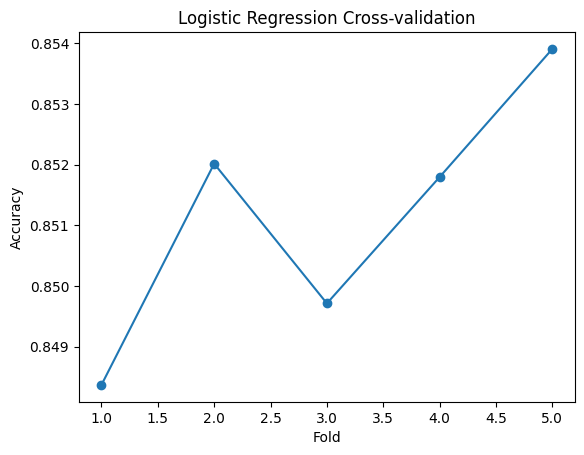

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#preprocess
scaler = StandardScaler()

#fit and transform on X_train
scaled_X_train = scaler.fit_transform(X_train)

#ensuring target variable is 1D using .ravel()
y_train = y_train.ravel()

#define the logistic regression model with increased max_iter
logreg_model = LogisticRegression(max_iter=200)

#perform 5-fold cross-validation
cv_scores_logreg = cross_val_score(logreg_model, scaled_X_train, y_train, cv=5)

print(f'Logistic Regression Cross-validation scores: {cv_scores_logreg}')
print(f'Mean Logistic Regression Cross-validation score: {cv_scores_logreg.mean()}')

#plot the cross-validation scores
plt.plot(range(1, 6), cv_scores_logreg, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Cross-validation')
plt.show()

Logistic Regression - Training Time: 0.9018185138702393 s
Logistic Regression - Training Accuracy: 0.852541461916462
Logistic Regression - Test Accuracy: 0.8572086596038692
Logistic Regression - Testing Time: 0.025057315826416016 s
Logistic Regression Cross-validation scores: [0.84836852 0.85201536 0.84971209 0.85179497 0.8539067 ]
Mean Logistic Regression Cross-validation score: 0.8511595278952087


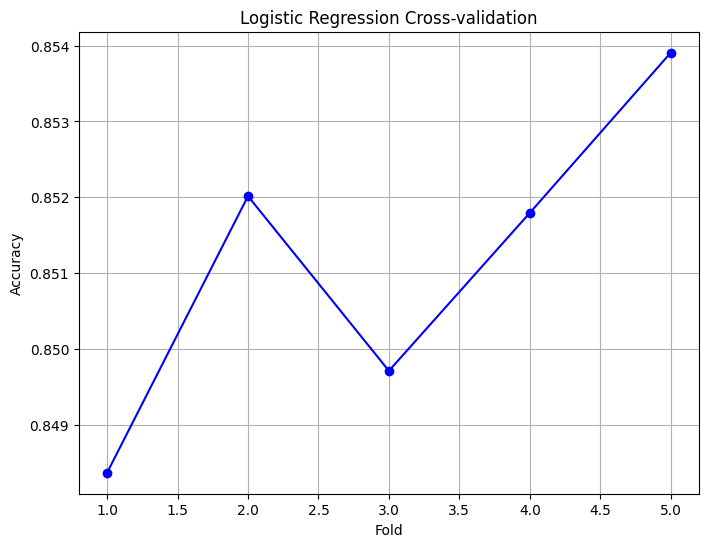

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import time
import numpy as np

#ensure that y_train is 1D using .ravel()
y_train = y_train.ravel()

#standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

#define the logistic regression model with increased max_iter
logreg_model = LogisticRegression(C=1, max_iter=200)

#train the model and calculate training time
start_time = time.time()
logreg_model.fit(scaled_X_train, y_train)
logreg_train_time = time.time() - start_time

#calculate training accuracy
logreg_train_accuracy = logreg_model.score(scaled_X_train, y_train)

#calculate test accuracy by using scaled validation data
scaled_X_val = scaler.transform(X_val)

#calculate testing time
start_time = time.time()
logreg_test_accuracy = logreg_model.score(scaled_X_val, y_val)
logreg_test_time = time.time() - start_time

print("Logistic Regression - Training Time:", logreg_train_time, "s")
print("Logistic Regression - Training Accuracy:", logreg_train_accuracy)
print("Logistic Regression - Test Accuracy:", logreg_test_accuracy)
print("Logistic Regression - Testing Time:", logreg_test_time, "s")

#perform cross-validation
cv_scores_logreg = cross_val_score(logreg_model, scaled_X_train, y_train, cv=5)

print(f"Logistic Regression Cross-validation scores: {cv_scores_logreg}")
print(f"Mean Logistic Regression Cross-validation score: {cv_scores_logreg.mean()}")

#plot the cross-validation results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores_logreg, marker='o', color='b')
plt.title('Logistic Regression Cross-validation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

#load your training and validation data
X_train = pd.read_csv('/content/X_train.csv')
y_train = pd.read_csv('/content/y_train.csv')
X_val = pd.read_csv('/content/X_val.csv')
y_val = pd.read_csv('/content/y_val.csv')

#print the shapes of the loaded data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (26048, 100)
y_train shape: (26048, 1)
X_val shape: (6513, 100)
y_val shape: (6513, 1)


Main Question 2

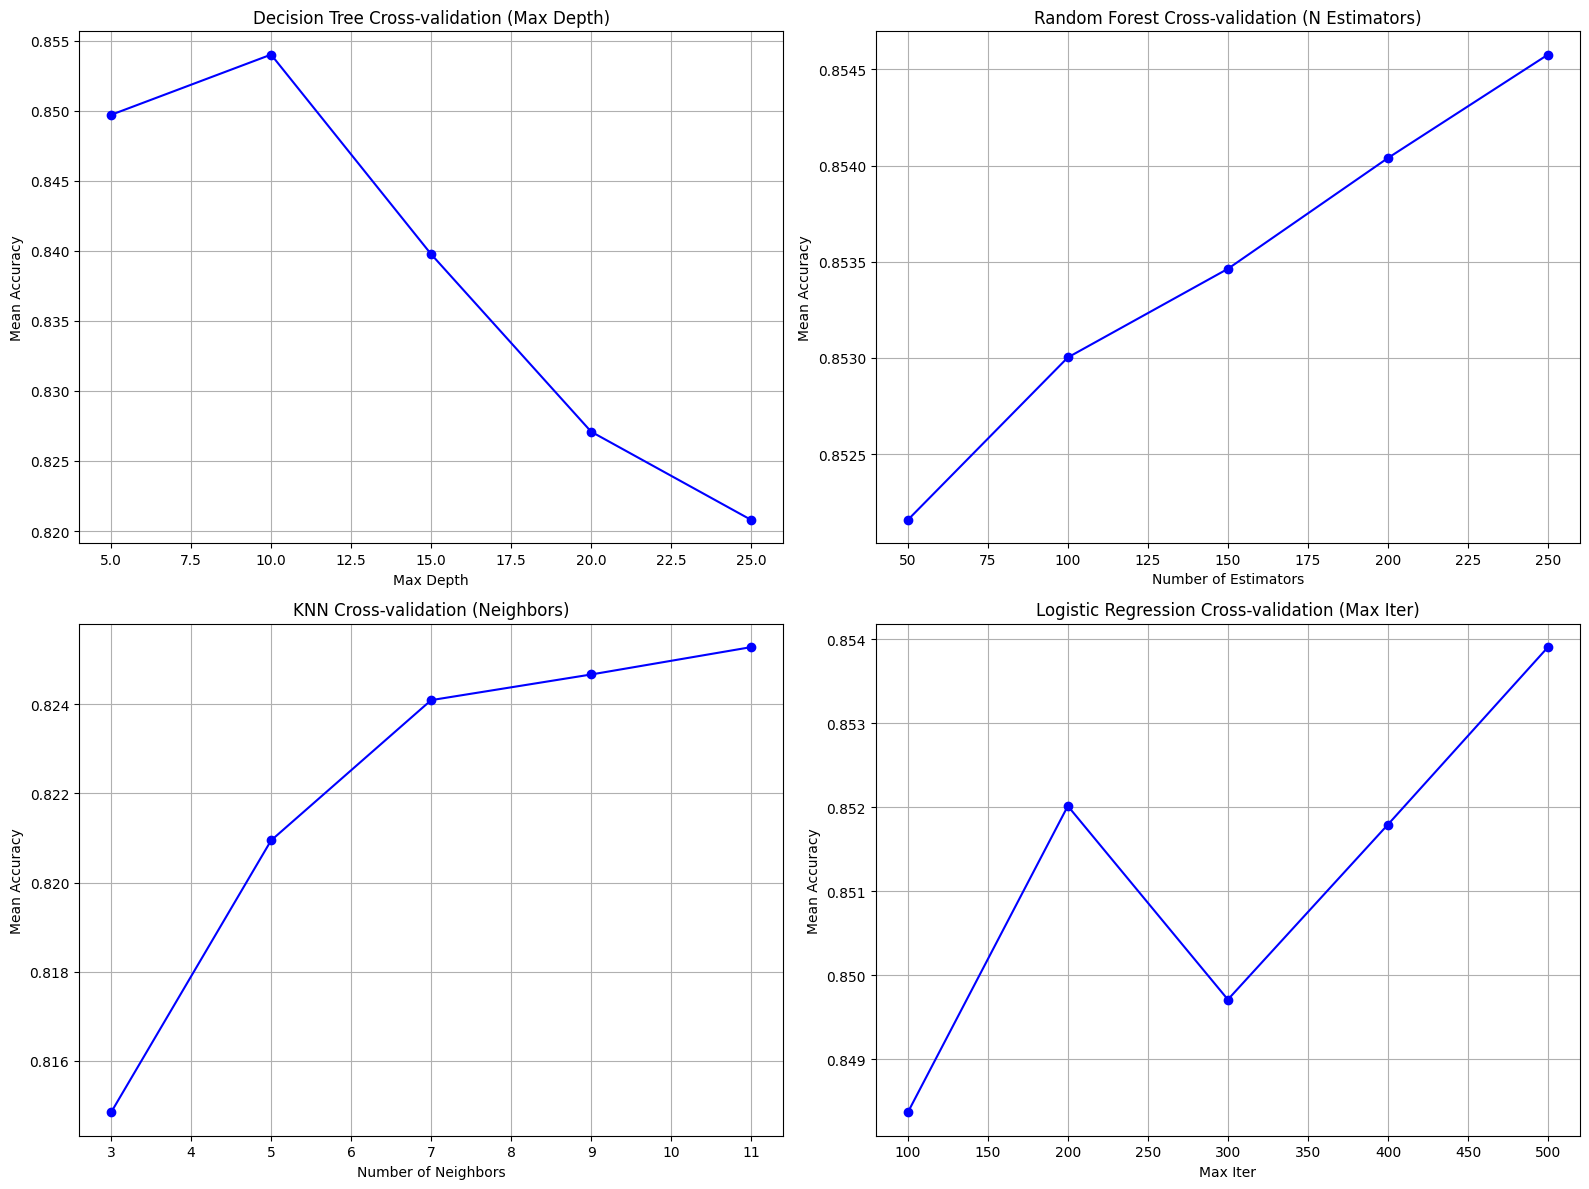

In [ ]:
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

#hyperparameters to test for each model
decision_tree_max_depth = [5, 10, 15, 20, 25]
random_forest_n_estimators = [50, 100, 150, 200, 250]
knn_neighbors = [3, 5, 7, 9, 11]
logreg_max_iter = [100, 200, 300, 400, 500]

#ensure target variable is 1D using .ravel()
y_train = y_train.ravel()
y_val = y_val.ravel()

#standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

#function to plot cross-validation results
def plot_cv_results(ax, hyperparameters, cv_scores, title, xlabel, ylabel):
    ax.plot(hyperparameters, [cv.mean() for cv in cv_scores], marker='o', color='b')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

#create a figure and axes for subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Decision Tree Classifier - Hyperparameter: max_depth
cv_scores_dt = []
for max_depth in decision_tree_max_depth:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    cv_score = cross_val_score(dt_model, scaled_X_train, y_train, cv=5)
    cv_scores_dt.append(cv_score)
plot_cv_results(axes[0, 0], decision_tree_max_depth, cv_scores_dt, 'Decision Tree Cross-validation (Max Depth)', 'Max Depth', 'Mean Accuracy')

#Random Forest Classifier - Hyperparameter: n_estimators
cv_scores_rf = []
for n_estimators in random_forest_n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    cv_score = cross_val_score(rf_model, scaled_X_train, y_train, cv=5)
    cv_scores_rf.append(cv_score)
plot_cv_results(axes[0, 1], random_forest_n_estimators, cv_scores_rf, 'Random Forest Cross-validation (N Estimators)', 'Number of Estimators', 'Mean Accuracy')

#K-Nearest Neighbors Classifier - Hyperparameter: n_neighbors
cv_scores_knn = []
for n_neighbors in knn_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_score = cross_val_score(knn_model, scaled_X_train, y_train, cv=5)
    cv_scores_knn.append(cv_score)
plot_cv_results(axes[1, 0], knn_neighbors, cv_scores_knn, 'KNN Cross-validation (Neighbors)', 'Number of Neighbors', 'Mean Accuracy')

#Logistic Regression - Hyperparameter: max_iter
logreg_model = LogisticRegression(C=1, max_iter=500, solver='lbfgs')  # max_iter=500 to handle convergence warnings
cv_scores_logreg = cross_val_score(logreg_model, scaled_X_train, y_train, cv=5)
plot_cv_results(axes[1, 1], logreg_max_iter, cv_scores_logreg, 'Logistic Regression Cross-validation (Max Iter)', 'Max Iter', 'Mean Accuracy')

#plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

#define the Decision Tree model with the chosen hyperparameter (max_depth=10)
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

#train the model and calculate training time
start_time = time.time()
dt_model.fit(X_train, y_train)
dt_train_time = time.time() - start_time

#calculate training accuracy
dt_train_accuracy = dt_model.score(X_train, y_train)

#calculate test accuracy by using validation data
dt_test_accuracy = dt_model.score(X_val, y_val)

#calculate testing time
start_time = time.time()
dt_test_accuracy = dt_model.score(X_val, y_val)
dt_test_time = time.time() - start_time

print("All timings are in second")
print("Decision Tree - Training Time:", dt_train_time)
print("Decision Tree - Training Accuracy:", dt_train_accuracy)
print("Decision Tree - Test Accuracy:", dt_test_accuracy)
print("Decision Tree - Testing Time:", dt_test_time)

All timings are in second
Decision Tree - Training Time: 0.3925156593322754
Decision Tree - Training Accuracy: 0.8726197788697788
Decision Tree - Test Accuracy: 0.8595117457392907
Decision Tree - Testing Time: 0.008434772491455078


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

# Define the Random Forest model with the chosen hyperparameter (n_estimators=250)
rf_model = RandomForestClassifier(n_estimators=250, random_state=42)

# Train the model and calculate training time
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

# Calculate training accuracy
rf_train_accuracy = rf_model.score(X_train, y_train)

# Now, let's calculate test accuracy by using validation data
rf_test_accuracy = rf_model.score(X_val, y_val)

# Calculate testing time
start_time = time.time()
rf_test_accuracy = rf_model.score(X_val, y_val)
rf_test_time = time.time() - start_time

# Print the results
print("All timings are in second")
print("Random Forest - Training Time:", rf_train_time)
print("Random Forest - Training Accuracy:", rf_train_accuracy)
print("Random Forest - Test Accuracy:", rf_test_accuracy)
print("Random Forest - Testing Time:", rf_test_time)


All timings are in second
Random Forest - Training Time: 18.4891197681427
Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.8588975894365116
Random Forest - Testing Time: 0.47608351707458496


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the KNN model with the chosen hyperparameter (n_neighbors=11)
knn_model = KNeighborsClassifier(n_neighbors=11)

# Train the model and calculate training time
start_time = time.time()
knn_model.fit(X_train, y_train)
knn_train_time = time.time() - start_time

# Calculate training accuracy
knn_train_accuracy = knn_model.score(X_train, y_train)

# Now, let's calculate test accuracy by using validation data
knn_test_accuracy = knn_model.score(X_val, y_val)

# Calculate testing time
start_time = time.time()
knn_test_accuracy = knn_model.score(X_val, y_val)
knn_test_time = time.time() - start_time

# Print the results
print("All timings are in second")
print("KNN - Training Time:", knn_train_time)
print("KNN - Training Accuracy:", knn_train_accuracy)
print("KNN - Test Accuracy:", knn_test_accuracy)
print("KNN - Testing Time:", knn_test_time)


All timings are in second
KNN - Training Time: 0.025374650955200195
KNN - Training Accuracy: 0.8098510442260443
KNN - Test Accuracy: 0.7948717948717948
KNN - Testing Time: 3.590822219848633


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import time

# Define the Logistic Regression model with the chosen hyperparameter (max_iter=500)
logreg_model = LogisticRegression(C=1, max_iter=500, random_state=42)

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)  # Scaling training data
scaled_X_val = scaler.transform(X_val)  # Scaling validation data

# Train the model and calculate training time
start_time = time.time()
logreg_model.fit(scaled_X_train, y_train)
logreg_train_time = time.time() - start_time

# Calculate training accuracy
logreg_train_accuracy = logreg_model.score(scaled_X_train, y_train)

# Now, let's calculate test accuracy by using validation data
logreg_test_accuracy = logreg_model.score(scaled_X_val, y_val)

# Calculate testing time
start_time = time.time()
logreg_test_accuracy = logreg_model.score(scaled_X_val, y_val)
logreg_test_time = time.time() - start_time

# Print the results
print("All timings are in second")
print("Logistic Regression - Training Time:", logreg_train_time)
print("Logistic Regression - Training Accuracy:", logreg_train_accuracy)
print("Logistic Regression - Test Accuracy:", logreg_test_accuracy)
print("Logistic Regression - Testing Time:", logreg_test_time)


All timings are in second
Logistic Regression - Training Time: 0.3154897689819336
Logistic Regression - Training Accuracy: 0.852541461916462
Logistic Regression - Test Accuracy: 0.8572086596038692
Logistic Regression - Testing Time: 0.002802610397338867


Halved Datasets (reduced)

In [ ]:
import pandas as pd

# Halve both the training and validation datasets
X_train_reduced = X_train[:len(X_train) // 2]
y_train_reduced = y_train[:len(y_train) // 2]

X_val_reduced = X_val[:len(X_val) // 2]
y_val_reduced = y_val[:len(y_val) // 2]

# Convert numpy arrays to DataFrame
X_train_reduced_df = pd.DataFrame(X_train_reduced)
y_train_reduced_df = pd.DataFrame(y_train_reduced)
X_val_reduced_df = pd.DataFrame(X_val_reduced)
y_val_reduced_df = pd.DataFrame(y_val_reduced)

# Save reduced datasets to CSV files
X_train_reduced_df.to_csv('/content/X_train_reduced.csv', index=False)
X_val_reduced_df.to_csv('/content/X_val_reduced.csv', index=False)

y_train_reduced_df.to_csv('/content/y_train_reduced.csv', index=False)
y_val_reduced_df.to_csv('/content/y_val_reduced.csv', index=False)

print("Reduced datasets have been saved")


Reduced datasets have been saved


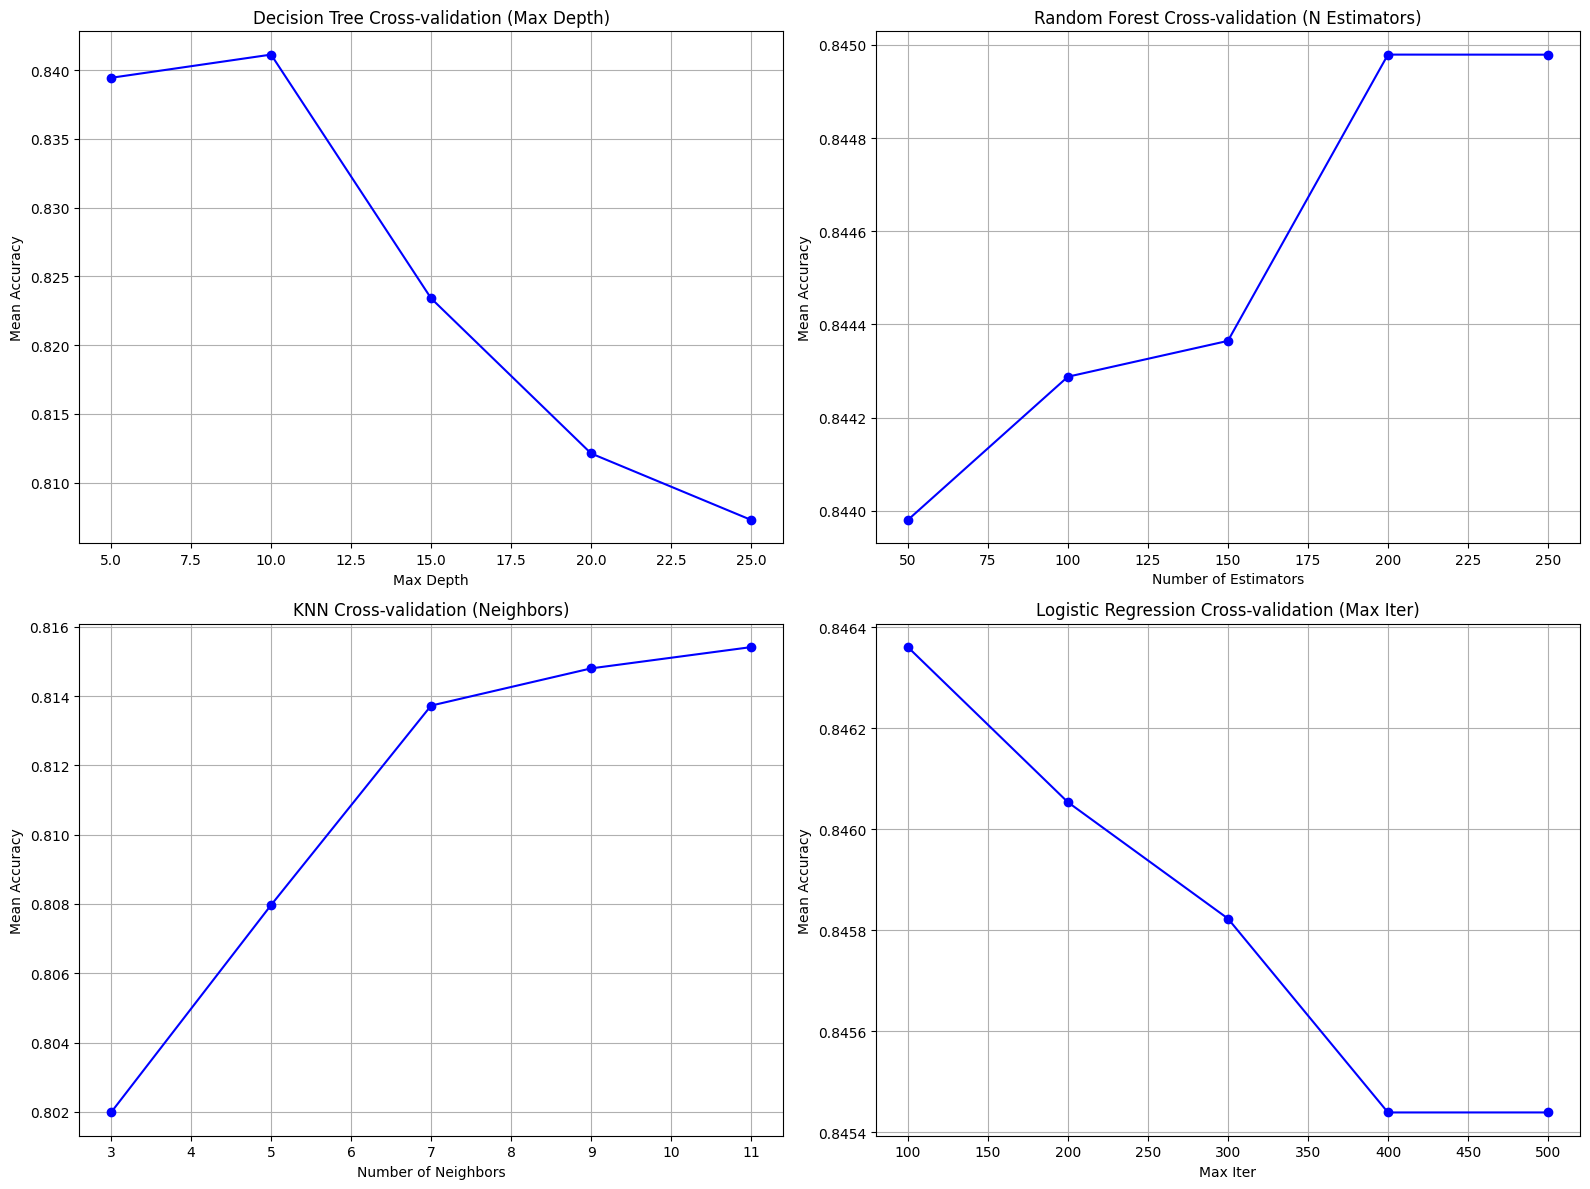

In [ ]:
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Hyperparameters to test for each model
decision_tree_max_depth = [5, 10, 15, 20, 25]
random_forest_n_estimators = [50, 100, 150, 200, 250]
knn_neighbors = [3, 5, 7, 9, 11]
logreg_max_iter = [100, 200, 300, 400, 500]  # For logistic regression

# Ensure target variable is 1D using .ravel()
y_train_reduced = y_train_reduced.ravel()
y_val_reduced = y_val_reduced.ravel()

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_reduced)  # Scaling training data
scaled_X_val = scaler.transform(X_val_reduced)  # Scaling validation data

# Function to plot cross-validation results
def plot_cv_results(ax, hyperparameters, cv_scores, title, xlabel, ylabel):
    ax.plot(hyperparameters, [cv.mean() for cv in cv_scores], marker='o', color='b')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Create a figure and axes for subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Decision Tree Classifier - Hyperparameter: max_depth
cv_scores_dt = []
for max_depth in decision_tree_max_depth:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    cv_score = cross_val_score(dt_model, scaled_X_train, y_train_reduced, cv=5)
    cv_scores_dt.append(cv_score)
plot_cv_results(axes[0, 0], decision_tree_max_depth, cv_scores_dt, 'Decision Tree Cross-validation (Max Depth)', 'Max Depth', 'Mean Accuracy')

# Random Forest Classifier - Hyperparameter: n_estimators
cv_scores_rf = []
for n_estimators in random_forest_n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    cv_score = cross_val_score(rf_model, scaled_X_train, y_train_reduced, cv=5)
    cv_scores_rf.append(cv_score)
plot_cv_results(axes[0, 1], random_forest_n_estimators, cv_scores_rf, 'Random Forest Cross-validation (N Estimators)', 'Number of Estimators', 'Mean Accuracy')

# K-Nearest Neighbors Classifier - Hyperparameter: n_neighbors
cv_scores_knn = []
for n_neighbors in knn_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_score = cross_val_score(knn_model, scaled_X_train, y_train_reduced, cv=5)
    cv_scores_knn.append(cv_score)
plot_cv_results(axes[1, 0], knn_neighbors, cv_scores_knn, 'KNN Cross-validation (Neighbors)', 'Number of Neighbors', 'Mean Accuracy')

# Logistic Regression - Hyperparameter: max_iter
cv_scores_logreg = []  # Initialize an empty list to store the cross-validation scores
for max_iter in logreg_max_iter:
    logreg_model = LogisticRegression(C=1, max_iter=max_iter, solver='saga')  # Logistic regression model with varying max_iter
    cv_score = cross_val_score(logreg_model, scaled_X_train, y_train_reduced, cv=5)  # Get cross-validation scores
    cv_scores_logreg.append(cv_score.mean())  # Append the mean of the score for each max_iter

# Plot the cross-validation results for Logistic Regression
plot_cv_results(axes[1, 1], logreg_max_iter, cv_scores_logreg, 'Logistic Regression Cross-validation (Max Iter)', 'Max Iter', 'Mean Accuracy')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Decision Tree - Hyperparameter: max_depth
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
start_time = time.time()
dt_model.fit(scaled_X_train, y_train_reduced)
dt_train_time = time.time() - start_time
dt_train_accuracy = dt_model.score(scaled_X_train, y_train_reduced)

# Prediction and test accuracy
start_time = time.time()
dt_y_pred = dt_model.predict(scaled_X_val)
dt_test_accuracy = accuracy_score(y_val_reduced, dt_y_pred)
dt_test_time = time.time() - start_time

print(f"Decision Tree - Training Time: {dt_train_time:.4f} s")
print(f"Decision Tree - Training Accuracy: {dt_train_accuracy:.4f}")
print(f"Decision Tree - Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Decision Tree - Testing Time: {dt_test_time:.4f} s")

# Random Forest - Hyperparameter: n_estimators
rf_model = RandomForestClassifier(n_estimators=250, random_state=42)
start_time = time.time()
rf_model.fit(scaled_X_train, y_train_reduced)
rf_train_time = time.time() - start_time
rf_train_accuracy = rf_model.score(scaled_X_train, y_train_reduced)

# Prediction and test accuracy
start_time = time.time()
rf_y_pred = rf_model.predict(scaled_X_val)
rf_test_accuracy = accuracy_score(y_val_reduced, rf_y_pred)
rf_test_time = time.time() - start_time

print(f"Random Forest - Training Time: {rf_train_time:.4f} s")
print(f"Random Forest - Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest - Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Random Forest - Testing Time: {rf_test_time:.4f} s")

# KNN - Hyperparameter: n_neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)
start_time = time.time()
knn_model.fit(scaled_X_train, y_train_reduced)
knn_train_time = time.time() - start_time
knn_train_accuracy = knn_model.score(scaled_X_train, y_train_reduced)

# Prediction and test accuracy
start_time = time.time()
knn_y_pred = knn_model.predict(scaled_X_val)
knn_test_accuracy = accuracy_score(y_val_reduced, knn_y_pred)
knn_test_time = time.time() - start_time

print(f"KNN - Training Time: {knn_train_time:.4f} s")
print(f"KNN - Training Accuracy: {knn_train_accuracy:.4f}")
print(f"KNN - Test Accuracy: {knn_test_accuracy:.4f}")
print(f"KNN - Testing Time: {knn_test_time:.4f} s")

# Logistic Regression - Hyperparameter: max_iter
logreg_model = LogisticRegression(C=1, max_iter=100, solver='saga')
start_time = time.time()
logreg_model.fit(scaled_X_train, y_train_reduced)
logreg_train_time = time.time() - start_time
logreg_train_accuracy = logreg_model.score(scaled_X_train, y_train_reduced)

# Prediction and test accuracy
start_time = time.time()
logreg_y_pred = logreg_model.predict(scaled_X_val)
logreg_test_accuracy = accuracy_score(y_val_reduced, logreg_y_pred)
logreg_test_time = time.time() - start_time

print(f"Logistic Regression - Training Time: {logreg_train_time:.4f} s")
print(f"Logistic Regression - Training Accuracy: {logreg_train_accuracy:.4f}")
print(f"Logistic Regression - Test Accuracy: {logreg_test_accuracy:.4f}")
print(f"Logistic Regression - Testing Time: {logreg_test_time:.4f} s")

# Perform 5-fold cross-validation for each model
# Decision Tree Cross-validation
cv_scores_dt = cross_val_score(dt_model, scaled_X_train, y_train_reduced, cv=5)
print(f"Decision Tree Cross-validation scores: {cv_scores_dt}")
print(f"Mean Decision Tree Cross-validation score: {cv_scores_dt.mean():.4f}")

# Random Forest Cross-validation
cv_scores_rf = cross_val_score(rf_model, scaled_X_train, y_train_reduced, cv=5)
print(f"Random Forest Cross-validation scores: {cv_scores_rf}")
print(f"Mean Random Forest Cross-validation score: {cv_scores_rf.mean():.4f}")

# KNN Cross-validation
cv_scores_knn = cross_val_score(knn_model, scaled_X_train, y_train_reduced, cv=5)
print(f"KNN Cross-validation scores: {cv_scores_knn}")
print(f"Mean KNN Cross-validation score: {cv_scores_knn.mean():.4f}")

# Logistic Regression Cross-validation
cv_scores_logreg = cross_val_score(logreg_model, scaled_X_train, y_train_reduced, cv=5)
print(f"Logistic Regression Cross-validation scores: {cv_scores_logreg}")
print(f"Mean Logistic Regression Cross-validation score: {cv_scores_logreg.mean():.4f}")


Decision Tree - Training Time: 0.4181 s
Decision Tree - Training Accuracy: 0.8762
Decision Tree - Test Accuracy: 0.8538
Decision Tree - Testing Time: 0.0071 s
Random Forest - Training Time: 9.4367 s
Random Forest - Training Accuracy: 1.0000
Random Forest - Test Accuracy: 0.8587
Random Forest - Testing Time: 0.8775 s
KNN - Training Time: 0.0260 s
KNN - Training Accuracy: 0.8496
KNN - Test Accuracy: 0.8286
KNN - Testing Time: 0.6013 s
Logistic Regression - Training Time: 2.7711 s
Logistic Regression - Training Accuracy: 0.8504
Logistic Regression - Test Accuracy: 0.8581
Logistic Regression - Testing Time: 0.0021 s
Decision Tree Cross-validation scores: [0.83761996 0.83992322 0.84836852 0.84261036 0.83717358]
Mean Decision Tree Cross-validation score: 0.8411
Random Forest Cross-validation scores: [0.83723608 0.83646833 0.84798464 0.85297505 0.85023041]
Mean Random Forest Cross-validation score: 0.8450
KNN Cross-validation scores: [0.80537428 0.80998081 0.821881   0.82418426 0.8156682 ]
Me

Question 3

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the original datasets for features and target variable
X = pd.read_csv('/content/X_train.csv')  # Features (replace with the correct path if needed)
y = pd.read_csv('/content/y_train.csv')  # Target variable (replace with the correct path if needed)

# Ensure that y is a 1D array
y = y.values.ravel()  # Flatten y if it is not already a 1D array

# Perform a 60:40 split (60% for training and 40% for validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Confirm the new shapes of the datasets after the split
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

# Optional: Save the split datasets as CSV files (if needed)
X_train.to_csv('/content/X_train_split.csv', index=False)
X_val.to_csv('/content/X_val_split.csv', index=False)
pd.DataFrame(y_train).to_csv('/content/y_train_split.csv', index=False)  # Save y_train
pd.DataFrame(y_val).to_csv('/content/y_val_split.csv', index=False)  # Save y_val


X_train shape: (15628, 100)
X_val shape: (10420, 100)
y_train shape: (15628,)
y_val shape: (10420,)


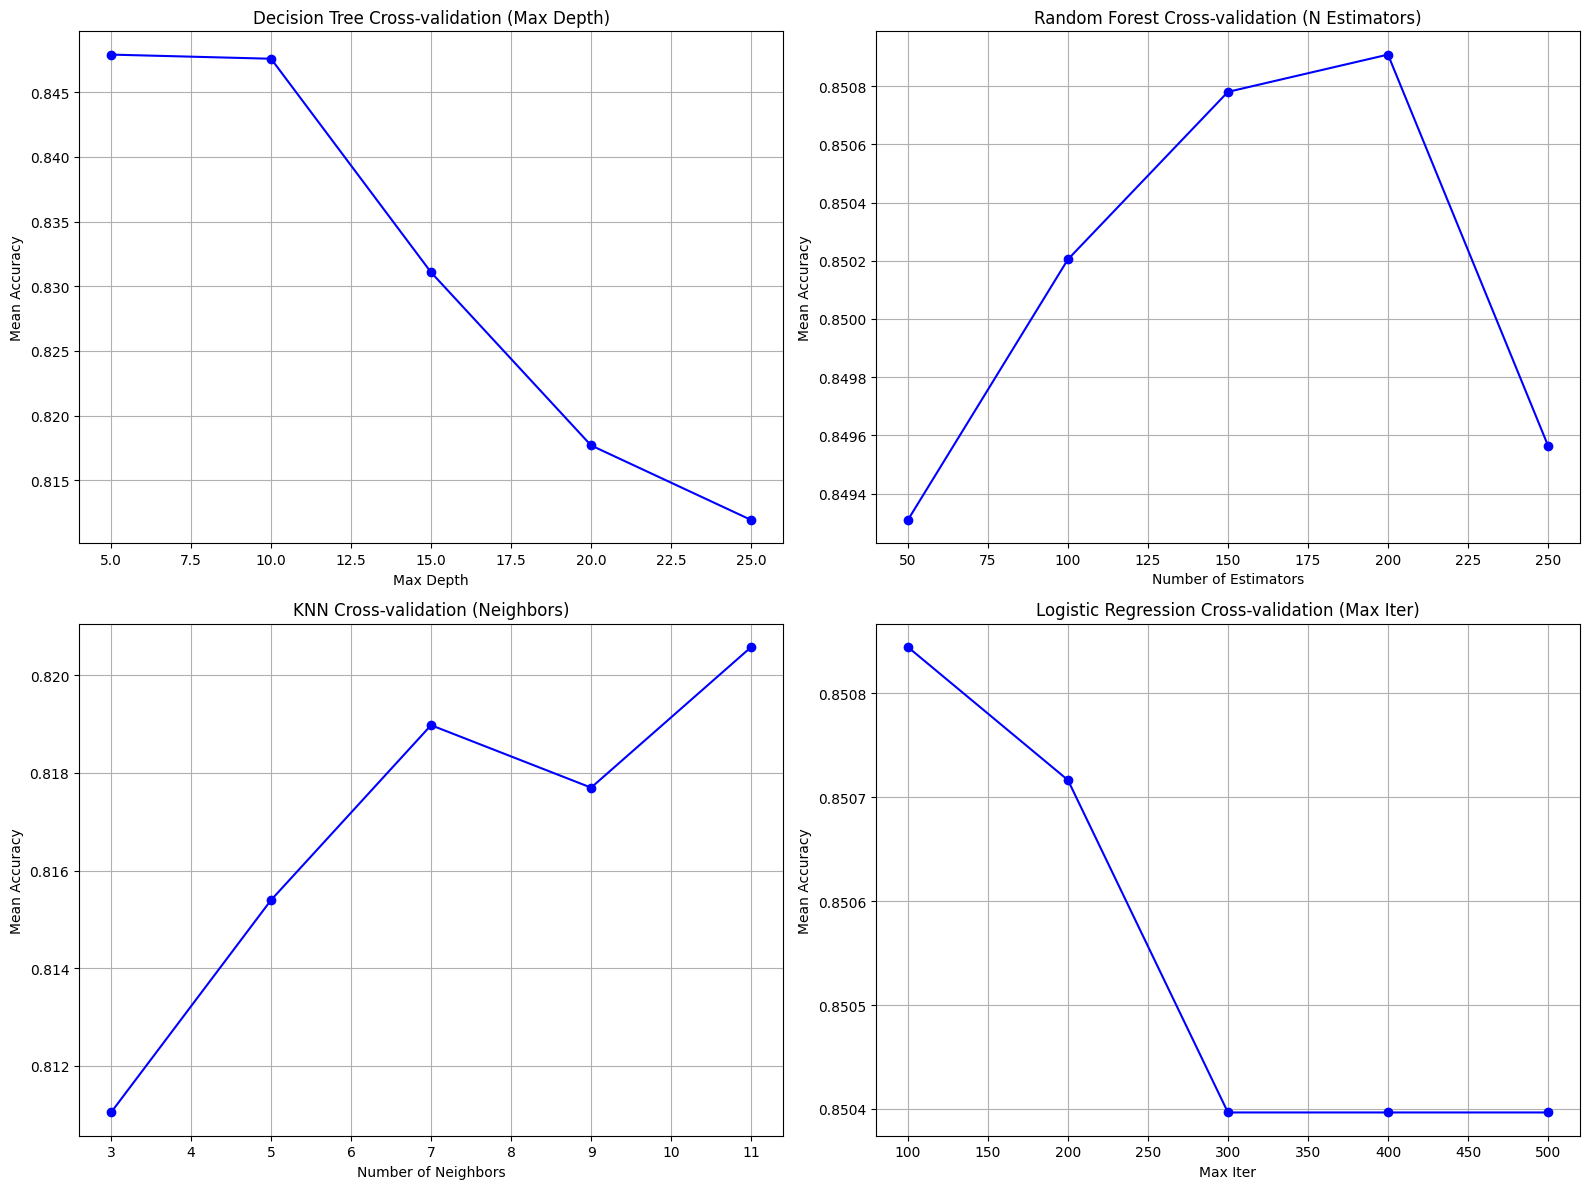

In [ ]:
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the split datasets
X_train = pd.read_csv('/content/X_train_split.csv')
X_val = pd.read_csv('/content/X_val_split.csv')
y_train = pd.read_csv('/content/y_train_split.csv').values.ravel()
y_val = pd.read_csv('/content/y_val_split.csv').values.ravel()

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)  # Scaling training data
scaled_X_val = scaler.transform(X_val)  # Scaling validation data

# Hyperparameters to test for each model
decision_tree_max_depth = [5, 10, 15, 20, 25]
random_forest_n_estimators = [50, 100, 150, 200, 250]
knn_neighbors = [3, 5, 7, 9, 11]
logreg_max_iter = [100, 200, 300, 400, 500]  # For logistic regression

# Function to plot cross-validation results
def plot_cv_results(ax, hyperparameters, cv_scores, title, xlabel, ylabel):
    ax.plot(hyperparameters, [cv.mean() for cv in cv_scores], marker='o', color='b')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Create a figure and axes for subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Decision Tree Classifier - Hyperparameter: max_depth
cv_scores_dt = []
for max_depth in decision_tree_max_depth:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    cv_score = cross_val_score(dt_model, scaled_X_train, y_train, cv=5)
    cv_scores_dt.append(cv_score)
plot_cv_results(axes[0, 0], decision_tree_max_depth, cv_scores_dt, 'Decision Tree Cross-validation (Max Depth)', 'Max Depth', 'Mean Accuracy')

# Random Forest Classifier - Hyperparameter: n_estimators
cv_scores_rf = []
for n_estimators in random_forest_n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    cv_score = cross_val_score(rf_model, scaled_X_train, y_train, cv=5)
    cv_scores_rf.append(cv_score)
plot_cv_results(axes[0, 1], random_forest_n_estimators, cv_scores_rf, 'Random Forest Cross-validation (N Estimators)', 'Number of Estimators', 'Mean Accuracy')

# K-Nearest Neighbors Classifier - Hyperparameter: n_neighbors
cv_scores_knn = []
for n_neighbors in knn_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_score = cross_val_score(knn_model, scaled_X_train, y_train, cv=5)
    cv_scores_knn.append(cv_score)
plot_cv_results(axes[1, 0], knn_neighbors, cv_scores_knn, 'KNN Cross-validation (Neighbors)', 'Number of Neighbors', 'Mean Accuracy')

# Logistic Regression - Hyperparameter: max_iter
cv_scores_logreg = []
for max_iter in logreg_max_iter:
    logreg_model = LogisticRegression(C=1, max_iter=max_iter, solver='saga')  # Logistic regression model with varying max_iter
    cv_score = cross_val_score(logreg_model, scaled_X_train, y_train, cv=5)
    cv_scores_logreg.append(cv_score)
plot_cv_results(axes[1, 1], logreg_max_iter, cv_scores_logreg, 'Logistic Regression Cross-validation (Max Iter)', 'Max Iter', 'Mean Accuracy')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize models with the best hyperparameters
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)

# Logistic Regression
logreg_model = LogisticRegression(C=1, max_iter=100, solver='lbfgs')

# Prepare the data (assumes X_train, y_train, X_val, y_val are already defined)
# X_train, X_val, y_train, y_val need to be defined prior

# Training and performance for Decision Tree
start_time = time.time()
dt_model.fit(X_train, y_train)
dt_train_time = time.time() - start_time
dt_train_accuracy = dt_model.score(X_train, y_train)

# Predicting and testing for Decision Tree
start_time = time.time()
dt_y_pred = dt_model.predict(X_val)
dt_test_time = time.time() - start_time
dt_test_accuracy = accuracy_score(y_val, dt_y_pred)

# Output for Decision Tree
print(f"Decision Tree - Training Time: {dt_train_time}s")
print(f"Decision Tree - Training Accuracy: {dt_train_accuracy}")
print(f"Decision Tree - Testing Time: {dt_test_time}s")
print(f"Decision Tree - Test Accuracy: {dt_test_accuracy}")

# Training and performance for Random Forest
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time
rf_train_accuracy = rf_model.score(X_train, y_train)

# Predicting and testing for Random Forest
start_time = time.time()
rf_y_pred = rf_model.predict(X_val)
rf_test_time = time.time() - start_time
rf_test_accuracy = accuracy_score(y_val, rf_y_pred)

# Output for Random Forest
print(f"Random Forest - Training Time: {rf_train_time}s")
print(f"Random Forest - Training Accuracy: {rf_train_accuracy}")
print(f"Random Forest - Testing Time: {rf_test_time}s")
print(f"Random Forest - Test Accuracy: {rf_test_accuracy}")

# Training and performance for K-Nearest Neighbors
start_time = time.time()
knn_model.fit(X_train, y_train)
knn_train_time = time.time() - start_time
knn_train_accuracy = knn_model.score(X_train, y_train)

# Predicting and testing for K-Nearest Neighbors
start_time = time.time()
knn_y_pred = knn_model.predict(X_val)
knn_test_time = time.time() - start_time
knn_test_accuracy = accuracy_score(y_val, knn_y_pred)

# Output for K-Nearest Neighbors
print(f"KNN - Training Time: {knn_train_time}s")
print(f"KNN - Training Accuracy: {knn_train_accuracy}")
print(f"KNN - Testing Time: {knn_test_time}s")
print(f"KNN - Test Accuracy: {knn_test_accuracy}")

# Training and performance for Logistic Regression
start_time = time.time()
logreg_model.fit(X_train, y_train)
logreg_train_time = time.time() - start_time
logreg_train_accuracy = logreg_model.score(X_train, y_train)

# Predicting and testing for Logistic Regression
start_time = time.time()
logreg_y_pred = logreg_model.predict(X_val)
logreg_test_time = time.time() - start_time
logreg_test_accuracy = accuracy_score(y_val, logreg_y_pred)

# Output for Logistic Regression
print(f"Logistic Regression - Training Time: {logreg_train_time}s")
print(f"Logistic Regression - Training Accuracy: {logreg_train_accuracy}")
print(f"Logistic Regression - Testing Time: {logreg_test_time}s")
print(f"Logistic Regression - Test Accuracy: {logreg_test_accuracy}")


Decision Tree - Training Time: 0.12003016471862793s
Decision Tree - Training Accuracy: 0.8757998464294855
Decision Tree - Testing Time: 0.00625157356262207s
Decision Tree - Test Accuracy: 0.8514395393474088
Random Forest - Training Time: 5.107304096221924s
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Time: 0.8084449768066406s
Random Forest - Test Accuracy: 0.8499040307101727
KNN - Training Time: 0.029127120971679688s
KNN - Training Accuracy: 0.8067571026362939
KNN - Testing Time: 6.439616918563843s
KNN - Test Accuracy: 0.7959692898272552
Logistic Regression - Training Time: 1.7772369384765625s
Logistic Regression - Training Accuracy: 0.7954952649091375
Logistic Regression - Testing Time: 0.05406045913696289s
Logistic Regression - Test Accuracy: 0.7974088291746642


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the CSV files for training and validation sets
X_train = pd.read_csv('/content/X_train_split.csv')  # Replace with correct path
X_val = pd.read_csv('/content/X_val_sp.csv')      # Replace with correct path
# y_train = pd.read_csv('/path_to_your_files/y_train.csv')  # Replace with correct path
# y_val = pd.read_csv('/path_to_your_files/y_val.csv')      # Replace with correct path

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)  # Scale training features
scaled_X_val = scaler.transform(X_val)          # Scale validation features with the same scaler

# Step 3: Apply PCA to reduce dimensions by half on the training data
pca = PCA(n_components=scaled_X_train.shape[1] // 2)  # Reduce dimensions by half
X_train_pca = pca.fit_transform(scaled_X_train)        # Fit and transform training data
X_val_pca = pca.transform(scaled_X_val)                # Transform validation data with same PCA model

# Step 4: Save the reduced datasets to CSV files for submission
pd.DataFrame(X_train_pca).to_csv('X_train_pca.csv', index=False)
pd.DataFrame(X_val_pca).to_csv('X_val_pca.csv', index=False)
# pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
# pd.DataFrame(y_val).to_csv('y_val.csv', index=False)

# Output confirmation
print("Reduced dataset has been saved as CSV files.")


Reduced dataset has been saved as CSV files.


In [ ]:
# Ensure that y_train has the same number of rows as X_train
y_train = y_train[:X_train.shape[0]]


In [ ]:
# Ensure the dimensions match
assert X_train.shape[0] == y_train.shape[0], "Mismatch in number of samples between X_train and y_train"

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (15628, 50)
y_train shape: (15628,)


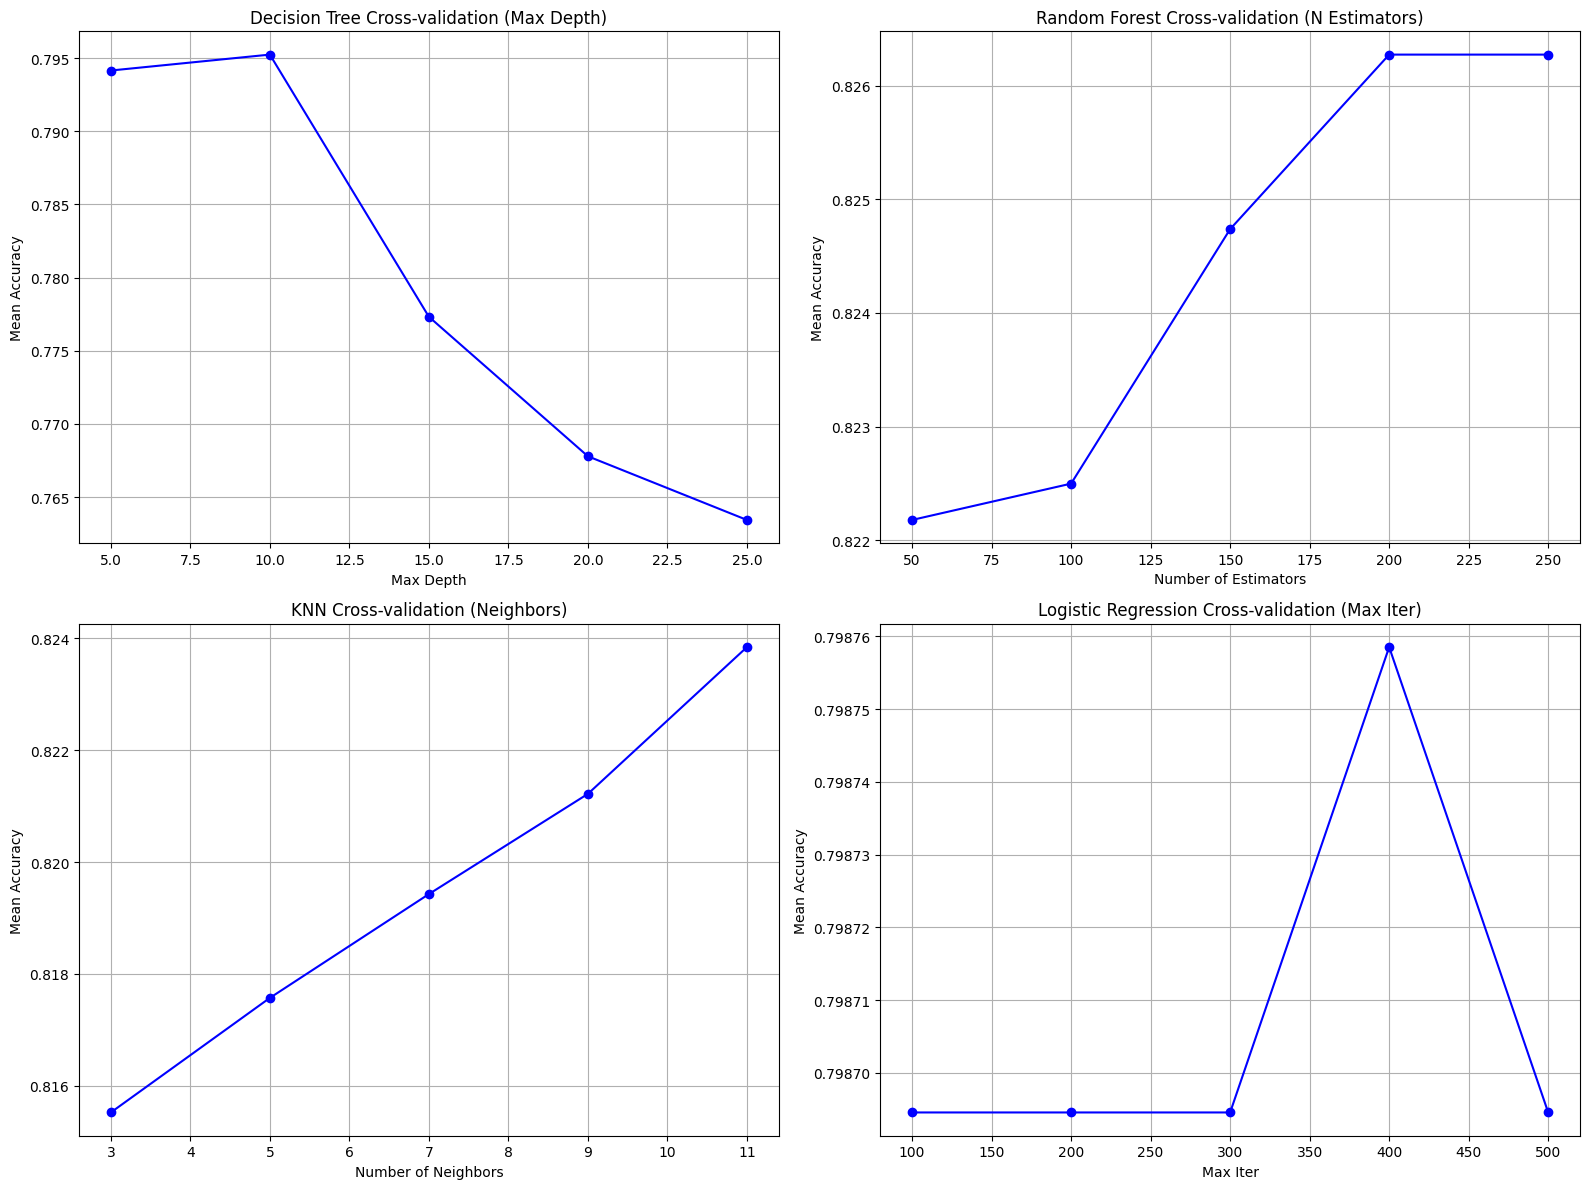

In [ ]:
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the split datasets
X_train = pd.read_csv('/content/X_train_pca.csv')
X_val = pd.read_csv('/content/X_val_pca.csv')
y_train = pd.read_csv('/content/y_train_split.csv').values.ravel()
y_val = pd.read_csv('/content/y_val_split.csv').values.ravel()

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)  # Scaling training data
scaled_X_val = scaler.transform(X_val)  # Scaling validation data

# Hyperparameters to test for each model
decision_tree_max_depth = [5, 10, 15, 20, 25]
random_forest_n_estimators = [50, 100, 150, 200, 250]
knn_neighbors = [3, 5, 7, 9, 11]
logreg_max_iter = [100, 200, 300, 400, 500]  # For logistic regression

# Function to plot cross-validation results
def plot_cv_results(ax, hyperparameters, cv_scores, title, xlabel, ylabel):
    ax.plot(hyperparameters, [cv.mean() for cv in cv_scores], marker='o', color='b')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Create a figure and axes for subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Decision Tree Classifier - Hyperparameter: max_depth
cv_scores_dt = []
for max_depth in decision_tree_max_depth:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    cv_score = cross_val_score(dt_model, scaled_X_train, y_train, cv=5)
    cv_scores_dt.append(cv_score)
plot_cv_results(axes[0, 0], decision_tree_max_depth, cv_scores_dt, 'Decision Tree Cross-validation (Max Depth)', 'Max Depth', 'Mean Accuracy')

# Random Forest Classifier - Hyperparameter: n_estimators
cv_scores_rf = []
for n_estimators in random_forest_n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    cv_score = cross_val_score(rf_model, scaled_X_train, y_train, cv=5)
    cv_scores_rf.append(cv_score)
plot_cv_results(axes[0, 1], random_forest_n_estimators, cv_scores_rf, 'Random Forest Cross-validation (N Estimators)', 'Number of Estimators', 'Mean Accuracy')

# K-Nearest Neighbors Classifier - Hyperparameter: n_neighbors
cv_scores_knn = []
for n_neighbors in knn_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_score = cross_val_score(knn_model, scaled_X_train, y_train, cv=5)
    cv_scores_knn.append(cv_score)
plot_cv_results(axes[1, 0], knn_neighbors, cv_scores_knn, 'KNN Cross-validation (Neighbors)', 'Number of Neighbors', 'Mean Accuracy')

# Logistic Regression - Hyperparameter: max_iter
cv_scores_logreg = []
for max_iter in logreg_max_iter:
    logreg_model = LogisticRegression(C=1, max_iter=max_iter, solver='saga')  # Logistic regression model with varying max_iter
    cv_score = cross_val_score(logreg_model, scaled_X_train, y_train, cv=5)
    cv_scores_logreg.append(cv_score)
plot_cv_results(axes[1, 1], logreg_max_iter, cv_scores_logreg, 'Logistic Regression Cross-validation (Max Iter)', 'Max Iter', 'Mean Accuracy')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize models with the best hyperparameters
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)

# Logistic Regression
logreg_model = LogisticRegression(C=1, max_iter=400, solver='saga')

# Prepare the data (assumes X_train, y_train, X_val, y_val are already defined)
# X_train, X_val, y_train, y_val need to be defined prior

# Training and performance for Decision Tree
start_time = time.time()
dt_model.fit(X_train, y_train)
dt_train_time = time.time() - start_time
dt_train_accuracy = dt_model.score(X_train, y_train)

# Predicting and testing for Decision Tree
start_time = time.time()
dt_y_pred = dt_model.predict(X_val)
dt_test_time = time.time() - start_time
dt_test_accuracy = accuracy_score(y_val, dt_y_pred)

# Output for Decision Tree
print(f"Decision Tree - Training Time: {dt_train_time}s")
print(f"Decision Tree - Training Accuracy: {dt_train_accuracy}")
print(f"Decision Tree - Testing Time: {dt_test_time}s")
print(f"Decision Tree - Test Accuracy: {dt_test_accuracy}")

# Training and performance for Random Forest
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time
rf_train_accuracy = rf_model.score(X_train, y_train)

# Predicting and testing for Random Forest
start_time = time.time()
rf_y_pred = rf_model.predict(X_val)
rf_test_time = time.time() - start_time
rf_test_accuracy = accuracy_score(y_val, rf_y_pred)

# Output for Random Forest
print(f"Random Forest - Training Time: {rf_train_time}s")
print(f"Random Forest - Training Accuracy: {rf_train_accuracy}")
print(f"Random Forest - Testing Time: {rf_test_time}s")
print(f"Random Forest - Test Accuracy: {rf_test_accuracy}")

# Training and performance for K-Nearest Neighbors
start_time = time.time()
knn_model.fit(X_train, y_train)
knn_train_time = time.time() - start_time
knn_train_accuracy = knn_model.score(X_train, y_train)

# Predicting and testing for K-Nearest Neighbors
start_time = time.time()
knn_y_pred = knn_model.predict(X_val)
knn_test_time = time.time() - start_time
knn_test_accuracy = accuracy_score(y_val, knn_y_pred)

# Output for K-Nearest Neighbors
print(f"KNN - Training Time: {knn_train_time}s")
print(f"KNN - Training Accuracy: {knn_train_accuracy}")
print(f"KNN - Testing Time: {knn_test_time}s")
print(f"KNN - Test Accuracy: {knn_test_accuracy}")

# Training and performance for Logistic Regression
start_time = time.time()
logreg_model.fit(X_train, y_train)
logreg_train_time = time.time() - start_time
logreg_train_accuracy = logreg_model.score(X_train, y_train)

# Predicting and testing for Logistic Regression
start_time = time.time()
logreg_y_pred = logreg_model.predict(X_val)
logreg_test_time = time.time() - start_time
logreg_test_accuracy = accuracy_score(y_val, logreg_y_pred)

# Output for Logistic Regression
print(f"Logistic Regression - Training Time: {logreg_train_time}s")
print(f"Logistic Regression - Training Accuracy: {logreg_train_accuracy}")
print(f"Logistic Regression - Testing Time: {logreg_test_time}s")
print(f"Logistic Regression - Test Accuracy: {logreg_test_accuracy}")


In [ ]:
import pandas as pd
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the PCA-reduced datasets
X_train = pd.read_csv('/content/X_train_pca.csv')  # Replace with the correct path for PCA-reduced training features
X_val = pd.read_csv('/content/X_val_pca.csv')      # Replace with the correct path for PCA-reduced validation features
y_train = pd.read_csv('/content/y_train_split.csv').values.ravel()  # Flatten y if it's a DataFrame
y_val = pd.read_csv('/content/y_val_split.csv').values.ravel()      # Flatten y if it's a DataFrame

# # Ensure y_train and X_train have the same number of samples
# assert X_train.shape[0] == y_train.shape[0], "Mismatch in number of samples between X_train and y_train"
# assert X_val.shape[0] == y_val.shape[0], "Mismatch in number of samples between X_val and y_val"

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)  # Scaling training features
scaled_X_val = scaler.transform(X_val)          # Scaling validation features with the same scaler

# Initialize models with the best hyperparameters
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)

# Logistic Regression
logreg_model = LogisticRegression(C=1, max_iter=400, solver='saga')

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Training the model and measuring the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = model.score(X_train, y_train)

    # Predicting and testing for the model
    start_time = time.time()
    y_pred = model.predict(X_val)
    test_time = time.time() - start_time
    test_accuracy = accuracy_score(y_val, y_pred)

    # Output the results
    print(f"{model_name} - Training Time: {train_time}s")
    print(f"{model_name} - Training Accuracy: {train_accuracy}")
    print(f"{model_name} - Testing Time: {test_time}s")
    print(f"{model_name} - Test Accuracy: {test_accuracy}")

# Evaluate all models
evaluate_model(dt_model, scaled_X_train, y_train, scaled_X_val, y_val, "Decision Tree")
evaluate_model(rf_model, scaled_X_train, y_train, scaled_X_val, y_val, "Random Forest")
evaluate_model(knn_model, scaled_X_train, y_train, scaled_X_val, y_val, "KNN")
evaluate_model(logreg_model, scaled_X_train, y_train, scaled_X_val, y_val, "Logistic Regression")


Decision Tree - Training Time: 0.8704519271850586s
Decision Tree - Training Accuracy: 0.8763757358587151
Decision Tree - Testing Time: 0.0024061203002929688s
Decision Tree - Test Accuracy: 0.7946257197696737
Random Forest - Training Time: 24.09176206588745s
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Time: 0.3062260150909424s
Random Forest - Test Accuracy: 0.8253358925143954
KNN - Training Time: 0.004348039627075195s
KNN - Training Accuracy: 0.8514845149731252
KNN - Testing Time: 1.599264144897461s
KNN - Test Accuracy: 0.8230326295585413
Logistic Regression - Training Time: 0.14128327369689941s
Logistic Regression - Training Accuracy: 0.7990785769132327
Logistic Regression - Testing Time: 0.0006680488586425781s
Logistic Regression - Test Accuracy: 0.7956813819577735


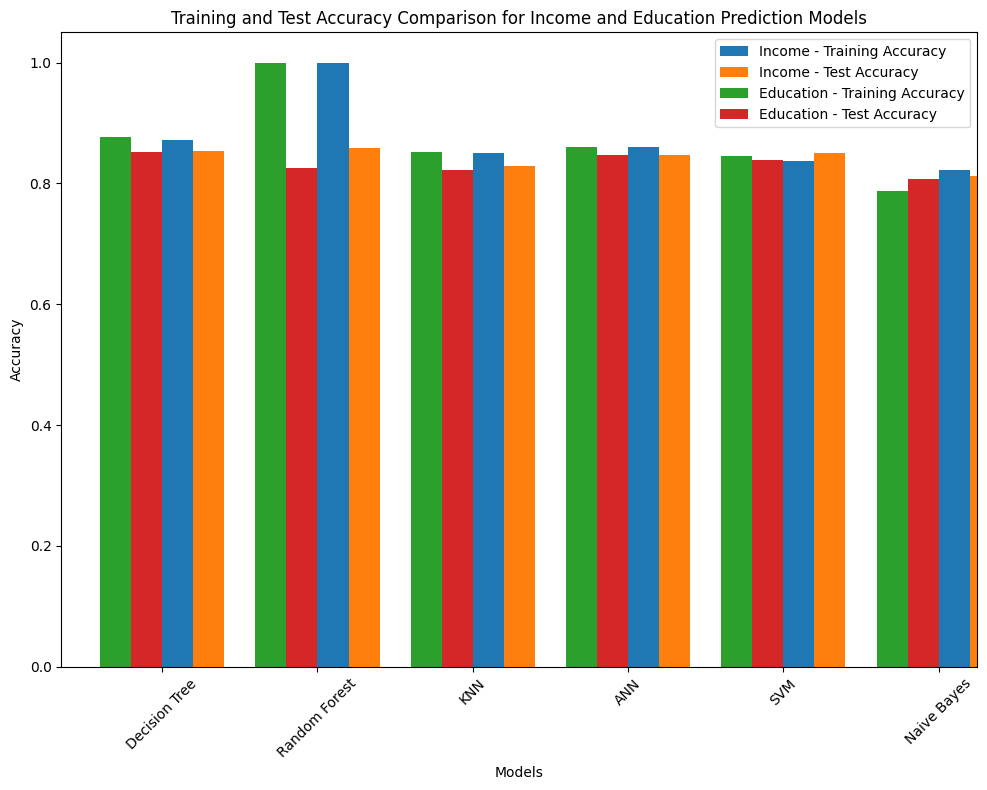

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Model_Performance_Table.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Set the model names as the index
data.set_index('Model', inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the data with custom colors
data[['Income - Training Accuracy', 'Income - Test Accuracy']].plot(kind='bar', ax=ax, position=0, width=0.4, color=['#1f77b4', '#ff7f0e'])
data[['Education - Training Accuracy', 'Education - Test Accuracy']].plot(kind='bar', ax=ax, position=1, width=0.4, color=['#2ca02c', '#d62728'])

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracy Comparison for Income and Education Prediction Models')
ax.set_xticklabels(data.index, rotation=45)
ax.legend(['Income - Training Accuracy', 'Income - Test Accuracy', 'Education - Training Accuracy', 'Education - Test Accuracy'])

# Show the plot
plt.tight_layout()
plt.show()


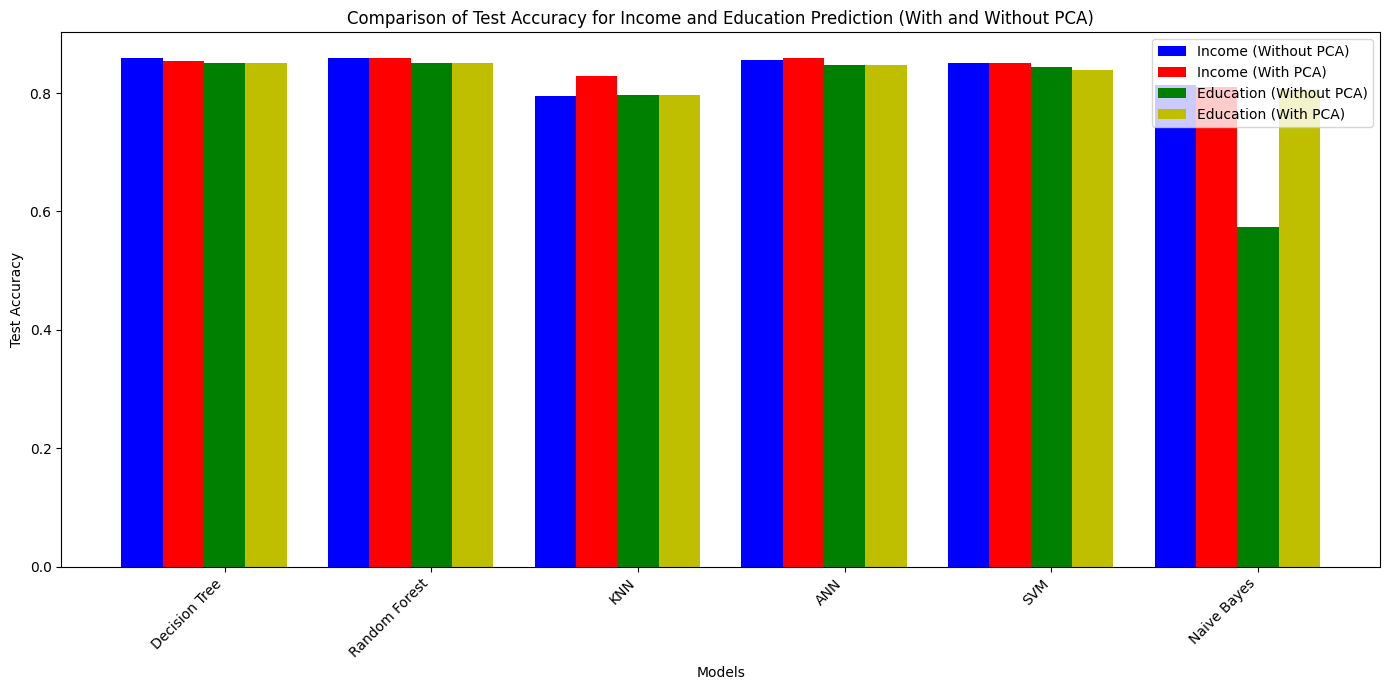

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table for Income and Education Prediction Test Accuracies
models = ["Decision Tree", "Random Forest", "KNN", "ANN", "SVM", "Naive Bayes"]
income_without_pca = [0.8595, 0.8589, 0.7949, 0.8550, 0.8504, 0.8128]
income_with_pca = [0.8538, 0.8587, 0.8286, 0.8584, 0.8504, 0.8100]
education_without_pca = [0.8514, 0.8499, 0.7959, 0.8465, 0.8440, 0.5740]
education_with_pca = [0.8514, 0.8499, 0.7959, 0.8465, 0.8390, 0.8070]

# Bar width and position for each model
bar_width = 0.2
index = np.arange(len(models))

# Create the bar plot
fig, ax = plt.subplots(figsize=(14, 7))

# Create bars for both income and education prediction with and without PCA
ax.bar(index - bar_width, income_without_pca, bar_width, label='Income (Without PCA)', color='b')
ax.bar(index, income_with_pca, bar_width, label='Income (With PCA)', color='r')
ax.bar(index + bar_width, education_without_pca, bar_width, label='Education (Without PCA)', color='g')
ax.bar(index + 2 * bar_width, education_with_pca, bar_width, label='Education (With PCA)', color='y')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Test Accuracy')
ax.set_title('Comparison of Test Accuracy for Income and Education Prediction (With and Without PCA)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


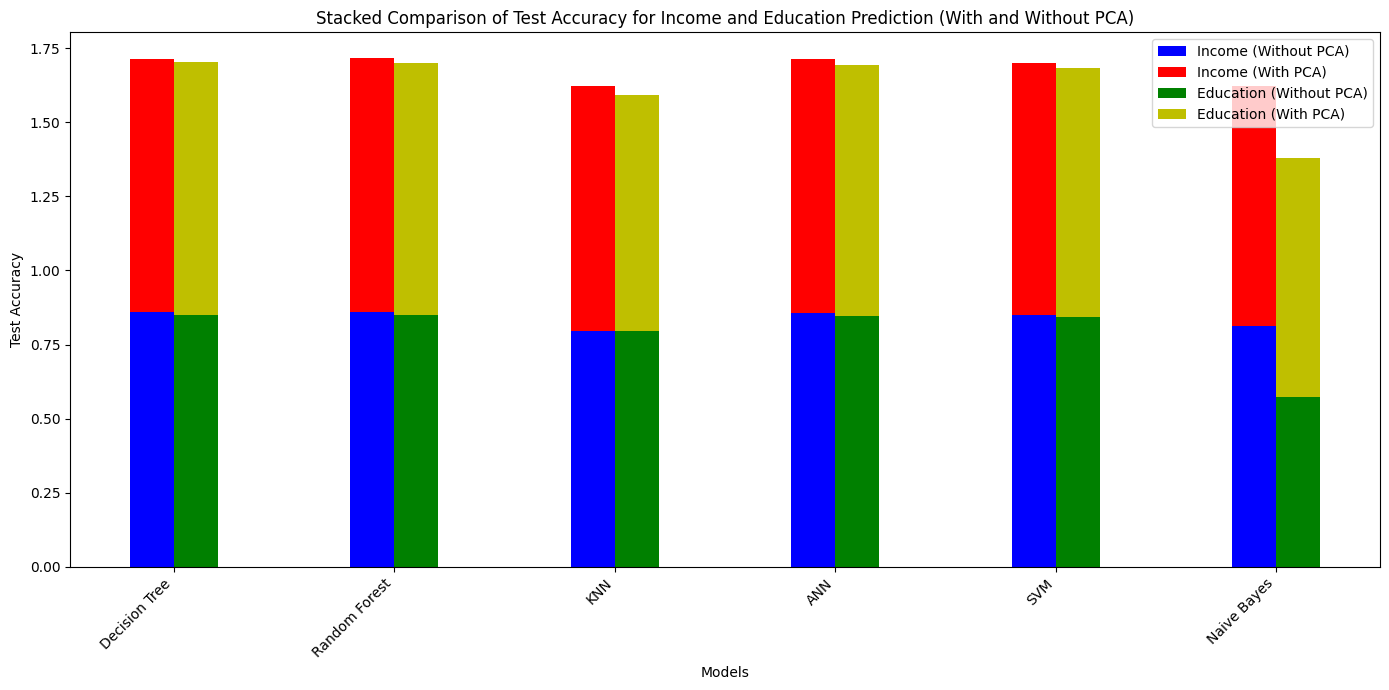

In [ ]:
# Create a stacked bar chart comparing accuracies
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(index, accuracy_income_without_pca, bar_width, label='Income (Without PCA)', color='b')
ax.bar(index, accuracy_income_with_pca, bar_width, label='Income (With PCA)', color='r', bottom=accuracy_income_without_pca)
ax.bar(index + bar_width, accuracy_education_without_pca, bar_width, label='Education (Without PCA)', color='g')
ax.bar(index + bar_width, accuracy_education_with_pca, bar_width, label='Education (With PCA)', color='y', bottom=accuracy_education_without_pca)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Test Accuracy')
ax.set_title('Stacked Comparison of Test Accuracy for Income and Education Prediction (With and Without PCA)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


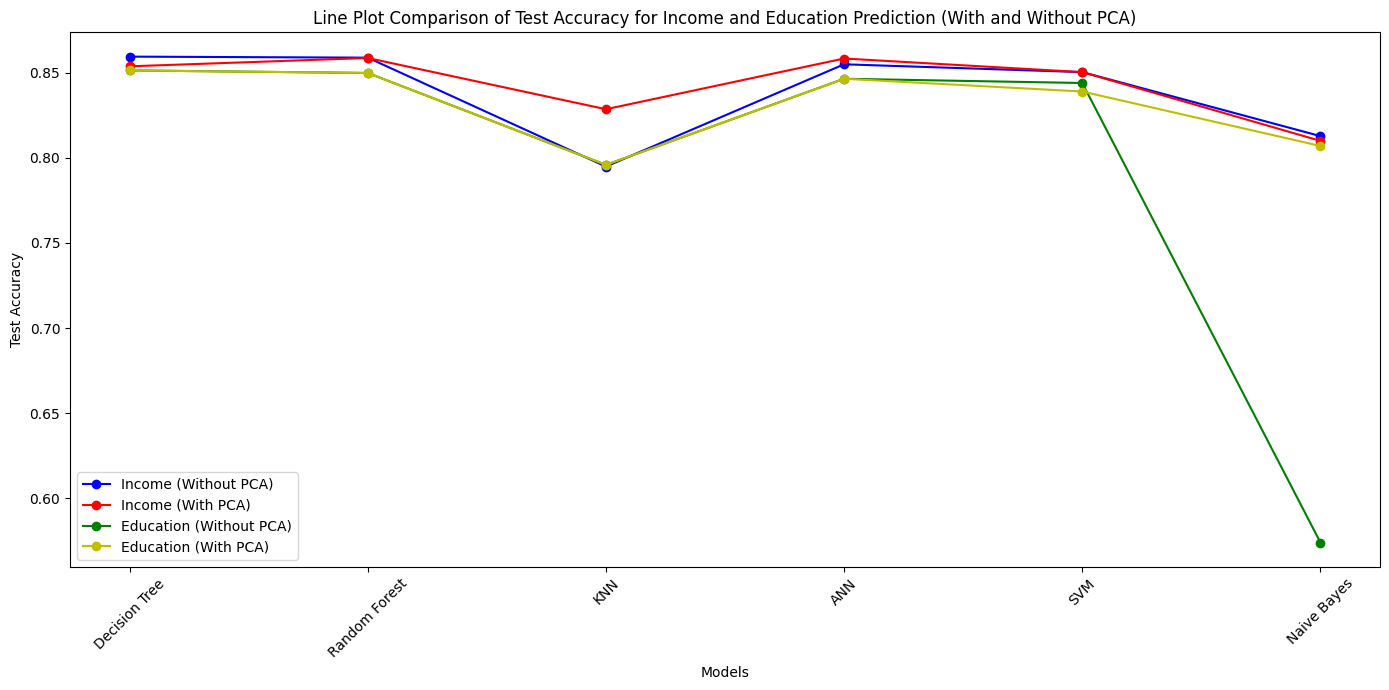

In [ ]:
# Line plot comparing accuracy for each model, with and without PCA
plt.figure(figsize=(14, 7))

plt.plot(models, accuracy_income_without_pca, marker='o', label="Income (Without PCA)", color='b')
plt.plot(models, accuracy_income_with_pca, marker='o', label="Income (With PCA)", color='r')
plt.plot(models, accuracy_education_without_pca, marker='o', label="Education (Without PCA)", color='g')
plt.plot(models, accuracy_education_with_pca, marker='o', label="Education (With PCA)", color='y')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Line Plot Comparison of Test Accuracy for Income and Education Prediction (With and Without PCA)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


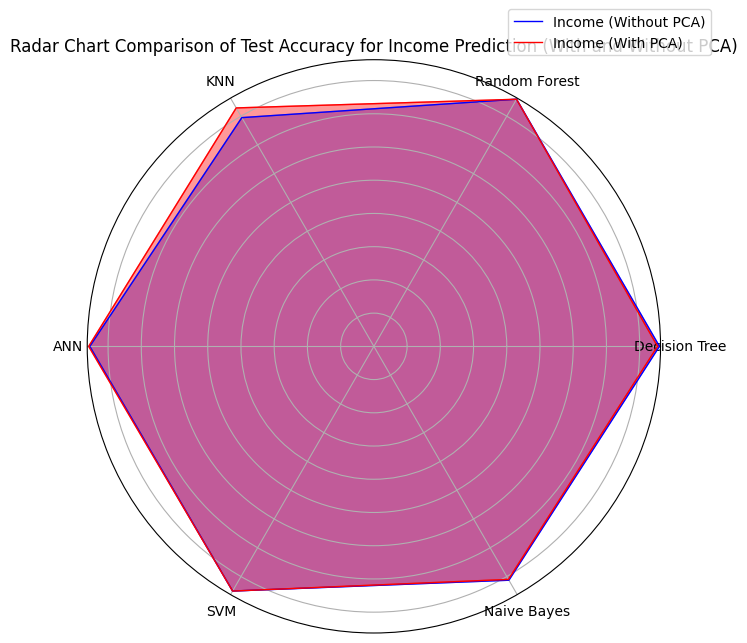

In [ ]:
# Prepare data for Radar Chart
from math import pi

# Define the number of variables
categories = ['Decision Tree', 'Random Forest', 'KNN', 'ANN', 'SVM', 'Naive Bayes']
income_without_pca_values = accuracy_income_without_pca
income_with_pca_values = accuracy_income_with_pca

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Plot for Income prediction with and without PCA
ax.plot(angles, income_without_pca_values + [income_without_pca_values[0]], linewidth=1, linestyle='solid', label='Income (Without PCA)', color='b')
ax.fill(angles, income_without_pca_values + [income_without_pca_values[0]], color='b', alpha=0.4)

ax.plot(angles, income_with_pca_values + [income_with_pca_values[0]], linewidth=1, linestyle='solid', label='Income (With PCA)', color='r')
ax.fill(angles, income_with_pca_values + [income_with_pca_values[0]], color='r', alpha=0.4)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Radar Chart Comparison of Test Accuracy for Income Prediction (With and Without PCA)')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()


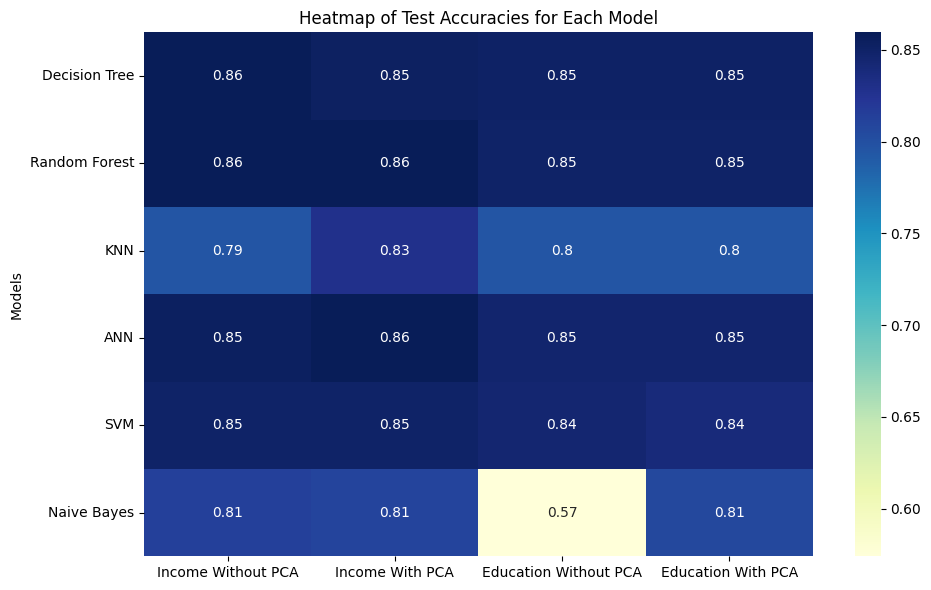

In [ ]:
import seaborn as sns

# Prepare the data for the heatmap
data_for_heatmap = [
    [0.8595, 0.8538, 0.8514, 0.8514],  # Decision Tree
    [0.8589, 0.8587, 0.8499, 0.8499],  # Random Forest
    [0.7949, 0.8286, 0.7959, 0.7959],  # KNN
    [0.8550, 0.8584, 0.8465, 0.8465],  # ANN
    [0.8504, 0.8504, 0.8440, 0.8390],  # SVM
    [0.8128, 0.8100, 0.5740, 0.8070]   # Naive Bayes
]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_for_heatmap, annot=True, cmap="YlGnBu", xticklabels=["Income Without PCA", "Income With PCA", "Education Without PCA", "Education With PCA"], yticklabels=models)

# Add labels and title
plt.title('Heatmap of Test Accuracies for Each Model')
plt.ylabel('Models')
plt.tight_layout()
plt.show()


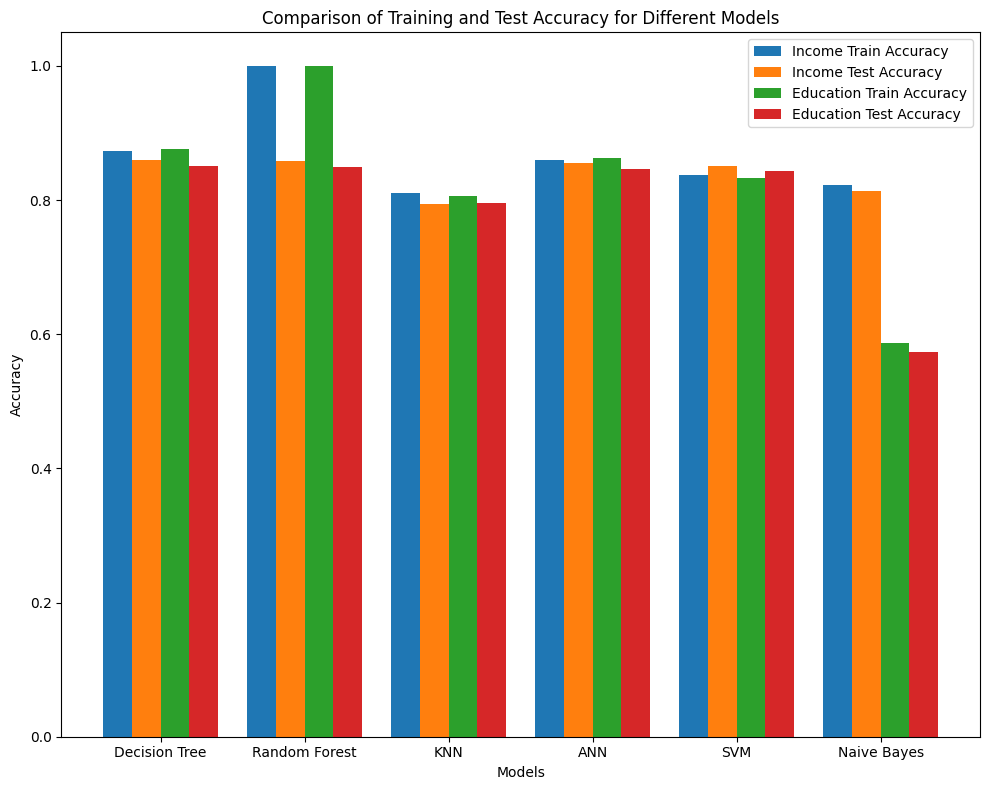

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Decision Tree', 'Random Forest', 'KNN', 'ANN', 'SVM', 'Naive Bayes']
income_train_accuracy = [0.8726, 1, 0.8098, 0.8602, 0.8372, 0.822]
income_test_accuracy = [0.8595, 0.8589, 0.7948, 0.8550, 0.8504, 0.8128]

education_train_accuracy = [0.8757, 1, 0.8067, 0.8626, 0.8324, 0.5872]
education_test_accuracy = [0.8514, 0.8499, 0.7959, 0.8465, 0.8440, 0.5740]

# Define thinner bar width and positions for the groups
bar_width = 0.2  # Reduced the width of the bars
index = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Bar charts for each prediction type
bar1 = ax.bar(index - 1.5*bar_width, income_train_accuracy, bar_width, label='Income Train Accuracy')
bar2 = ax.bar(index - 0.5*bar_width, income_test_accuracy, bar_width, label='Income Test Accuracy')

bar3 = ax.bar(index + 0.5*bar_width, education_train_accuracy, bar_width, label='Education Train Accuracy')
bar4 = ax.bar(index + 1.5*bar_width, education_test_accuracy, bar_width, label='Education Test Accuracy')

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracy for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()


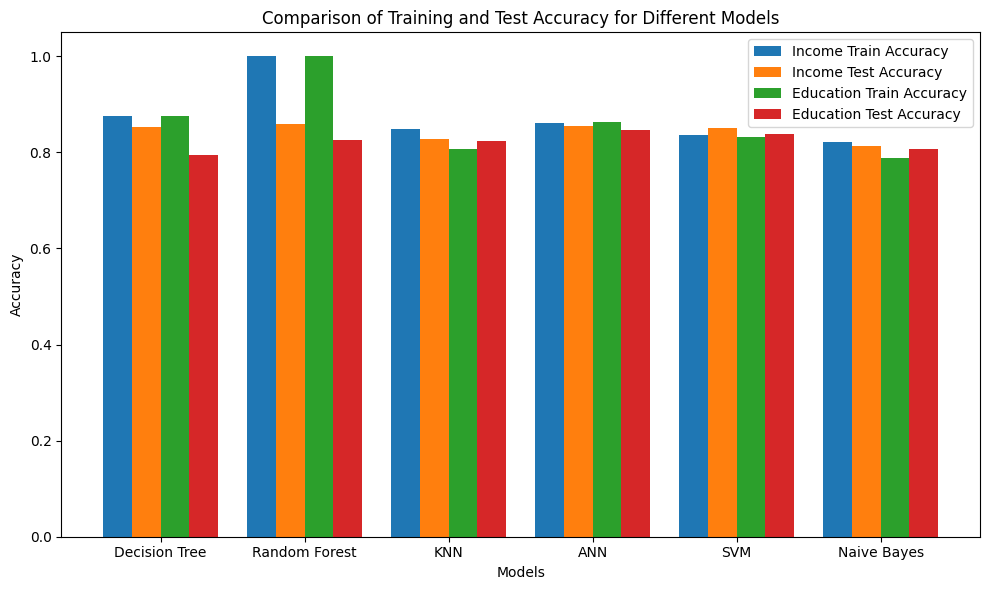

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Decision Tree', 'Random Forest', 'KNN', 'ANN', 'SVM', 'Naive Bayes']
income_train_accuracy = [0.8762, 1, 0.8496, 0.8607, 0.8372, 0.822]
income_test_accuracy = [0.8538, 0.8587, 0.8286, 0.8550, 0.8504, 0.8128]

education_train_accuracy = [0.8763, 1, 0.8067, 0.8626, 0.8324, 0.7874]
education_test_accuracy = [0.7946, 0.8253, 0.8230, 0.8465, 0.8390, 0.8070]

# Define bar width and positions for the groups
bar_width = 0.2
index = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar charts for each prediction type
bar1 = ax.bar(index - 1.5*bar_width, income_train_accuracy, bar_width, label='Income Train Accuracy')
bar2 = ax.bar(index - 0.5*bar_width, income_test_accuracy, bar_width, label='Income Test Accuracy')

bar3 = ax.bar(index + 0.5*bar_width, education_train_accuracy, bar_width, label='Education Train Accuracy')
bar4 = ax.bar(index + 1.5*bar_width, education_test_accuracy, bar_width, label='Education Test Accuracy')

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracy for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()


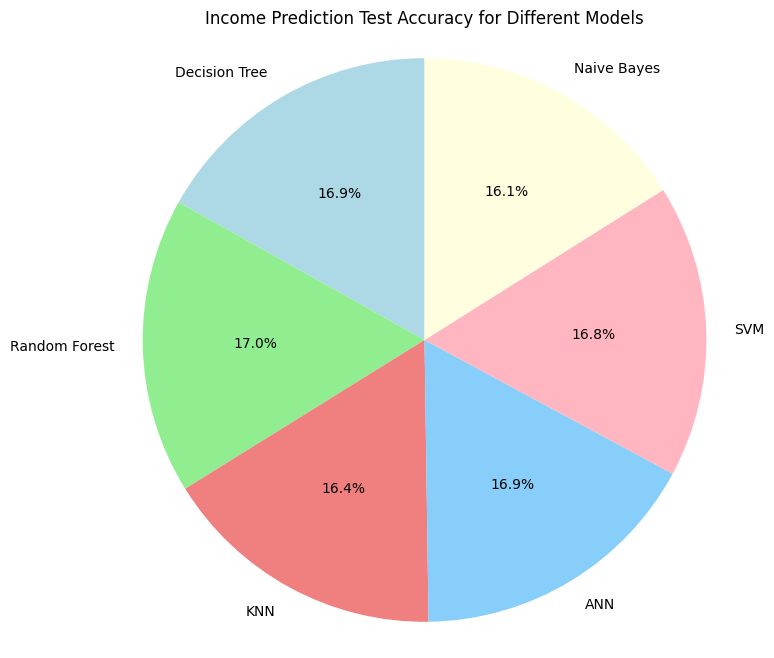

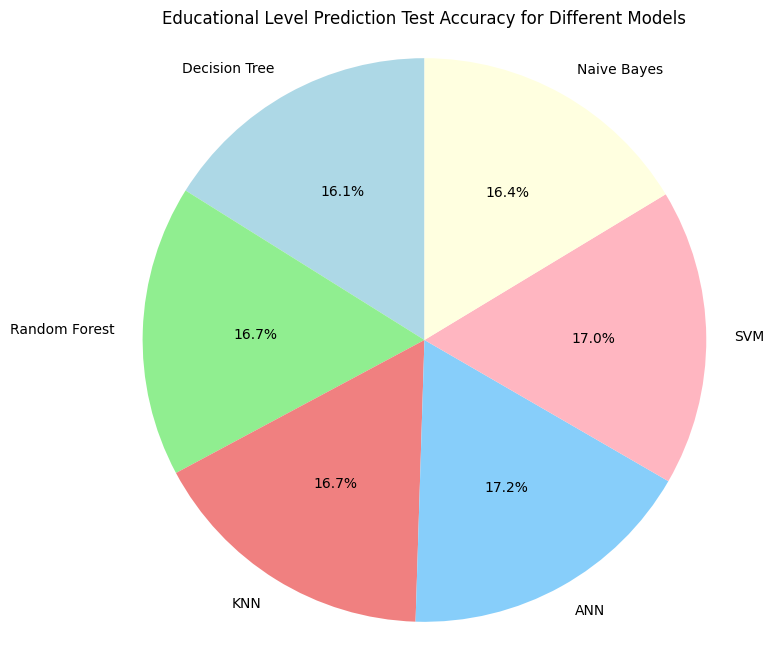

In [ ]:
import matplotlib.pyplot as plt

# Data for the models (Test Accuracy)
models = ['Decision Tree', 'Random Forest', 'KNN', 'ANN', 'SVM', 'Naive Bayes']
income_test_accuracy = [0.8538, 0.8587, 0.8286, 0.8550, 0.8504, 0.8128]
education_test_accuracy = [0.7946, 0.8253, 0.8230, 0.8465, 0.8390, 0.8070]

# Pie Chart for Income Prediction Test Accuracy
plt.figure(figsize=(8, 8))
plt.pie(income_test_accuracy, labels=models, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow'])
plt.title("Income Prediction Test Accuracy for Different Models")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Pie Chart for Educational Level Prediction Test Accuracy
plt.figure(figsize=(8, 8))
plt.pie(education_test_accuracy, labels=models, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow'])
plt.title("Educational Level Prediction Test Accuracy for Different Models")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


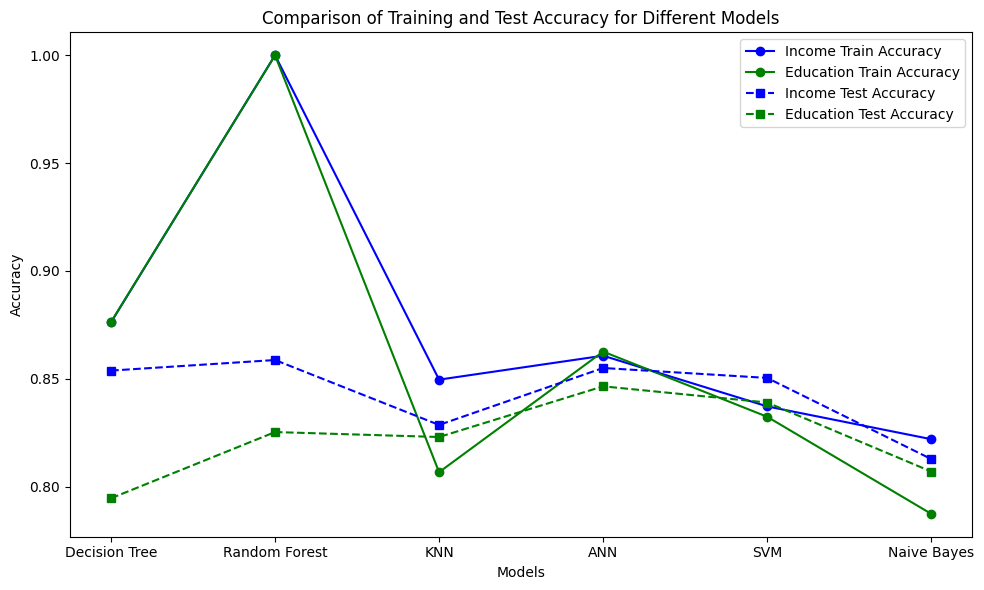

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Decision Tree', 'Random Forest', 'KNN', 'ANN', 'SVM', 'Naive Bayes']
income_train_accuracy = [0.8762, 1, 0.8496, 0.8607, 0.8372, 0.822]
income_test_accuracy = [0.8538, 0.8587, 0.8286, 0.8550, 0.8504, 0.8128]

education_train_accuracy = [0.8763, 1, 0.8067, 0.8626, 0.8324, 0.7874]
education_test_accuracy = [0.7946, 0.8253, 0.8230, 0.8465, 0.8390, 0.8070]

# Create line chart
plt.figure(figsize=(10, 6))

# Plot Training Accuracy for both tasks
plt.plot(models, income_train_accuracy, label='Income Train Accuracy', marker='o', linestyle='-', color='b')
plt.plot(models, education_train_accuracy, label='Education Train Accuracy', marker='o', linestyle='-', color='g')

# Plot Test Accuracy for both tasks
plt.plot(models, income_test_accuracy, label='Income Test Accuracy', marker='s', linestyle='--', color='b')
plt.plot(models, education_test_accuracy, label='Education Test Accuracy', marker='s', linestyle='--', color='g')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Test Accuracy for Different Models')
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()
